In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA

In [2]:
# Load the dataset
df = pd.read_csv("gun_deaths.csv")

In [3]:
# Explore the dataset
df.head()

,year,month,intent,police,sex,age,race,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,Other specified,HS/GED


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100798 entries, 0 to 100797
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       100798 non-null  int64  
 1   month      100798 non-null  int64  
 2   intent     100797 non-null  object 
 3   police     100798 non-null  int64  
 4   sex        100798 non-null  object 
 5   age        100780 non-null  float64
 6   race       100798 non-null  object 
 7   place      99414 non-null   object 
 8   education  99376 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB


In [5]:
df.describe()

,year,month,police,age
count,100798.000000,100798.000000,100798.000000,100780.000000
mean,2013.000357,6.567601,0.013909,43.857601
std,0.816278,3.405609,0.117114,19.496181
min,2012.000000,1.000000,0.000000,0.000000
25%,2012.000000,4.000000,0.000000,27.000000
50%,2013.000000,7.000000,0.000000,42.000000
75%,2014.000000,9.000000,0.000000,58.000000
max,2014.000000,12.000000,1.000000,107.000000


In [6]:
df["intent"].value_counts()

intent
Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
Name: count, dtype: int64

In [7]:
# Preprocess the dataset
# Convert categorical features to numeric values
df["sex"] = df["sex"].map({"M": 0, "F": 1})
df["race"] = df["race"].map({"White": 0, "Black": 1, "Hispanic": 2, "Asian/Pacific Islander": 3, "Native American/Native Alaskan": 4})
df["place"] = df["place"].map({"Home": 0, "Street": 1, "Other specified": 2, "Other unspecified": 3, "Trade/service area": 4, "Farm": 5, "Industrial/construction": 6, "School/instiution": 7, "Sports": 8, "Residential institution": 9})
df["education"] = df["education"].map({"BA+": 0, "Some college": 1, "HS/GED": 2, "Less than HS": 3})

In [8]:
# Handle missing values
df = df.dropna()

In [9]:
# Split the dataset into features and target
X = df.drop("intent", axis=1)
y = df["intent"]

In [10]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Feature selection using chi-square test
selector = SelectKBest(chi2, k=5)
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['month', 'age', 'race', 'place', 'education'], dtype='object')


In [12]:
# Dimensionality reduction using PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.96027737 0.02932068]


In [13]:
# Define the classification algorithms
log_reg = LogisticRegression()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
mlp = MLPClassifier()

In [14]:
# Train and test the models using the original features
models = [log_reg, dtree, rf, mlp]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "Neural Network"]
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print(model_names[i])
    print("Accuracy:", acc)
    print("Confusion matrix:\n", cm)
    print("Classification report:\n", cr)

C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

Logistic Regression
Accuracy: 0.7655971024843137
Confusion matrix:
 [[    0   125   188     0]
 [    0  4200  2456     0]
 [    0  1665 10808     0]
 [    0    49   112     0]]
Classification report:
               precision    recall  f1-score   support

  Accidental       0.00      0.00      0.00       313
    Homicide       0.70      0.63      0.66      6656
     Suicide       0.80      0.87      0.83     12473
Undetermined       0.00      0.00      0.00       161

    accuracy                           0.77     19603
   macro avg       0.37      0.37      0.37     19603
weighted avg       0.74      0.77      0.75     19603

Decision Tree
Accuracy: 0.755139519461307
Confusion matrix:
 [[   23   100   187     3]
 [  137  4620  1859    40]
 [  234  2028 10158    53]
 [    6    46   107     2]]
Classification report:
               precision    recall  f1-score   support

  Accidental       0.06      0.07      0.06       313
    Homicide       0.68      0.69      0.69      6656
     Su

C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Neural Network
Accuracy: 0.6849971943069938
Confusion matrix:
 [[    0    68   177    68]
 [    0  2950  2131  1575]
 [    0   763 10444  1266]
 [    0    29    98    34]]
Classification report:
               precision    recall  f1-score   support

  Accidental       0.00      0.00      0.00       313
    Homicide       0.77      0.44      0.56      6656
     Suicide       0.81      0.84      0.82     12473
Undetermined       0.01      0.21      0.02       161

    accuracy                           0.68     19603
   macro avg       0.40      0.37      0.35     19603
weighted avg       0.78      0.68      0.72     19603



C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# Train and test the models using the selected features
models = [log_reg, dtree, rf, mlp]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "Neural Network"]
for i, model in enumerate(models):
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print(model_names[i])
    print("Accuracy:", acc)
    print("Confusion matrix:\n", cm)
    print("Classification report:\n", cr)

C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

Logistic Regression
Accuracy: 0.7826353109217977
Confusion matrix:
 [[    0   118   195     0]
 [    0  4325  2331     0]
 [    0  1456 11017     0]
 [    0    47   114     0]]
Classification report:
               precision    recall  f1-score   support

  Accidental       0.00      0.00      0.00       313
    Homicide       0.73      0.65      0.69      6656
     Suicide       0.81      0.88      0.84     12473
Undetermined       0.00      0.00      0.00       161

    accuracy                           0.78     19603
   macro avg       0.38      0.38      0.38     19603
weighted avg       0.76      0.78      0.77     19603

Decision Tree
Accuracy: 0.7878896087333571
Confusion matrix:
 [[   15   101   196     1]
 [   85  4702  1858    11]
 [  120  1604 10726    23]
 [    1    43   115     2]]
Classification report:
               precision    recall  f1-score   support

  Accidental       0.07      0.05      0.06       313
    Homicide       0.73      0.71      0.72      6656
     S

C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Neural Network
Accuracy: 0.8359434780390756
Confusion matrix:
 [[    0    96   217     0]
 [    0  4869  1787     0]
 [    0   955 11518     0]
 [    0    41   120     0]]
Classification report:
               precision    recall  f1-score   support

  Accidental       0.00      0.00      0.00       313
    Homicide       0.82      0.73      0.77      6656
     Suicide       0.84      0.92      0.88     12473
Undetermined       0.00      0.00      0.00       161

    accuracy                           0.84     19603
   macro avg       0.42      0.41      0.41     19603
weighted avg       0.81      0.84      0.82     19603



C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Train and test the models using the PCA features
models = [log_reg, dtree, rf, mlp]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "Neural Network"]
for i, model in enumerate(models):
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print(model_names[i])
    print("Accuracy:", acc)
    print("Confusion matrix:\n", cm)
    print("Classification report:\n", cr)

C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression
Accuracy: 0.6910676937203489
Confusion matrix:
 [[   0  134  179    0]
 [   0 3550 3106    0]
 [   0 2476 9997    0]
 [   0   65   96    0]]
Classification report:
               precision    recall  f1-score   support

  Accidental       0.00      0.00      0.00       313
    Homicide       0.57      0.53      0.55      6656
     Suicide       0.75      0.80      0.77     12473
Undetermined       0.00      0.00      0.00       161

    accuracy                           0.69     19603
   macro avg       0.33      0.33      0.33     19603
weighted avg       0.67      0.69      0.68     19603

Decision Tree
Accuracy: 0.7415701678314544
Confusion matrix:
 [[   10   120   182     1]
 [  126  4388  2102    40]
 [  189  2091 10138    55]
 [    2    53   105     1]]
Classification report:
               precision    recall  f1-score   support

  Accidental       0.03      0.03      0.03       313
    Homicide       0.66      0.66      0.66      6656
     Suicide       0.8

C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Neural Network
Accuracy: 0.6922919961230424
Confusion matrix:
 [[   0  139  174    0]
 [   0 3874 2782    0]
 [   0 2776 9697    0]
 [   0   73   88    0]]
Classification report:
               precision    recall  f1-score   support

  Accidental       0.00      0.00      0.00       313
    Homicide       0.56      0.58      0.57      6656
     Suicide       0.76      0.78      0.77     12473
Undetermined       0.00      0.00      0.00       161

    accuracy                           0.69     19603
   macro avg       0.33      0.34      0.34     19603
weighted avg       0.68      0.69      0.68     19603



# Unsupervised Learning

In [1]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("gun_deaths.csv")

# Preprocess the dataset
df = df.dropna()

# Encode categorical features
label_encoder = LabelEncoder()
df["sex"] = label_encoder.fit_transform(df["sex"])
df["race"] = label_encoder.fit_transform(df["race"])
df["place"] = label_encoder.fit_transform(df["place"])
df["education"] = label_encoder.fit_transform(df["education"])

# Select relevant features for clustering
features_for_clustering = ["year", "month", "sex", "age", "race", "place", "education"]

X = df[features_for_clustering]

# Define the clustering algorithms
kmeans = KMeans(n_clusters=4, random_state=42)


# Fit and predict the clusters using the features
kmeans_labels = kmeans.fit_predict(X)


# Evaluate the clusters using various metrics
kmeans_sil = silhouette_score(X, kmeans_labels)
kmeans_ch = calinski_harabasz_score(X, kmeans_labels)
kmeans_db = davies_bouldin_score(X, kmeans_labels)


# Print the evaluation results
print("K-means")
print("Silhouette score:", kmeans_sil)
print("Calinski-Harabasz score:", kmeans_ch)
print("Davies-Bouldin score:", kmeans_db)



C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-means
Silhouette score: 0.4224143351543275
Calinski-Harabasz score: 231121.02466258613
Davies-Bouldin score: 0.7578587480815923


C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


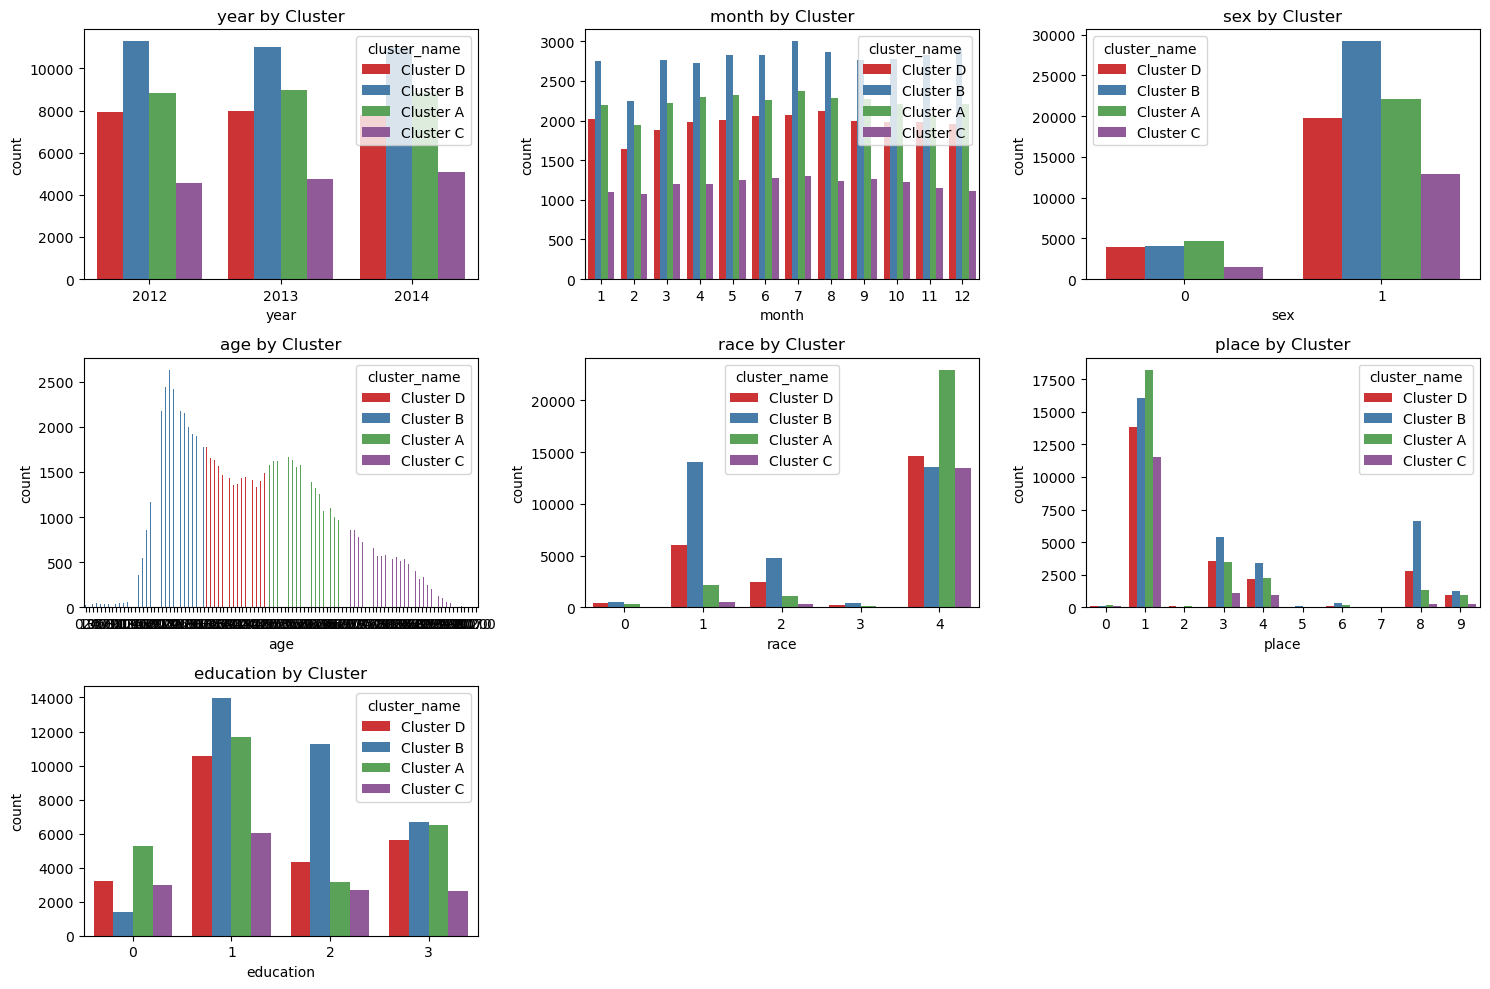

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("gun_deaths.csv")

# Preprocess the dataset
df = df.dropna()

# Encode categorical features
label_encoder = LabelEncoder()
df["sex"] = label_encoder.fit_transform(df["sex"])
df["race"] = label_encoder.fit_transform(df["race"])
df["place"] = label_encoder.fit_transform(df["place"])
df["education"] = label_encoder.fit_transform(df["education"])

# Select relevant features for clustering
features_for_clustering = ["year", "month", "sex", "age", "race", "place", "education"]

X = df[features_for_clustering]

# Define the clustering algorithm
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit and predict the clusters using the features
kmeans_labels = kmeans.fit_predict(X)

# Assign cluster labels to the dataframe
df["cluster"] = kmeans_labels

# Name the clusters
cluster_names = {0: "Cluster A", 1: "Cluster B", 2: "Cluster C", 3: "Cluster D"}
df["cluster_name"] = df["cluster"].map(cluster_names)

# Create a catplot with subplots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_for_clustering):
    plt.subplot(3, 3, i + 1)  # Adjust the subplot layout as needed
    sns.countplot(data=df, x=feature, hue="cluster_name", palette="Set1")
    plt.title(f"{feature} by Cluster")

plt.tight_layout()
plt.show()

C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


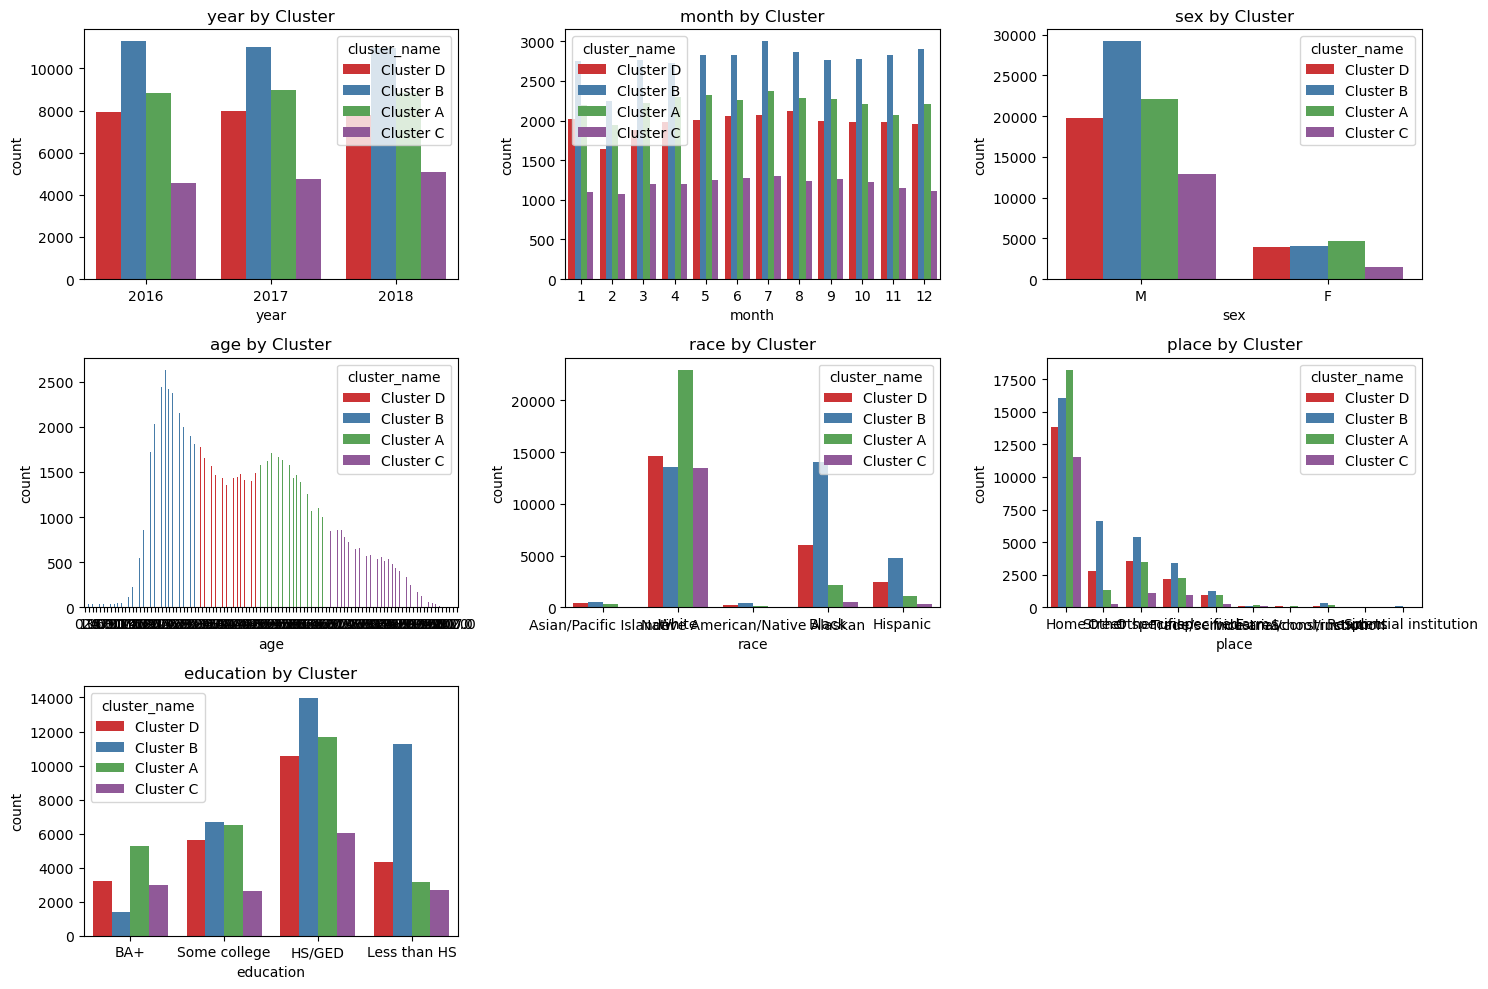

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("gun_deaths.csv")

# Preprocess the dataset
df = df.dropna()

# Create a copy of the dataframe for encoding
df_encoded = df.copy()

# Encode categorical features
label_encoder = LabelEncoder()
df_encoded["sex"] = label_encoder.fit_transform(df_encoded["sex"])
df_encoded["race"] = label_encoder.fit_transform(df_encoded["race"])
df_encoded["place"] = label_encoder.fit_transform(df_encoded["place"])
df_encoded["education"] = label_encoder.fit_transform(df_encoded["education"])

# Select relevant features for clustering
features_for_clustering = ["year", "month", "sex", "age", "race", "place", "education"]

X = df_encoded[features_for_clustering]

# Define the clustering algorithm
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit and predict the clusters using the features
kmeans_labels = kmeans.fit_predict(X)

# Assign cluster labels to the original dataframe
df["cluster"] = kmeans_labels

# Name the clusters
cluster_names = {0: "Cluster A", 1: "Cluster B", 2: "Cluster C", 3: "Cluster D"}
df["cluster_name"] = df["cluster"].map(cluster_names)

# Create a catplot with subplots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_for_clustering):
    plt.subplot(3, 3, i + 1)  # Adjust the subplot layout as needed
    sns.countplot(data=df, x=feature, hue="cluster_name", palette="Set1")
    plt.title(f"{feature} by Cluster")

plt.tight_layout()
plt.show()

C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


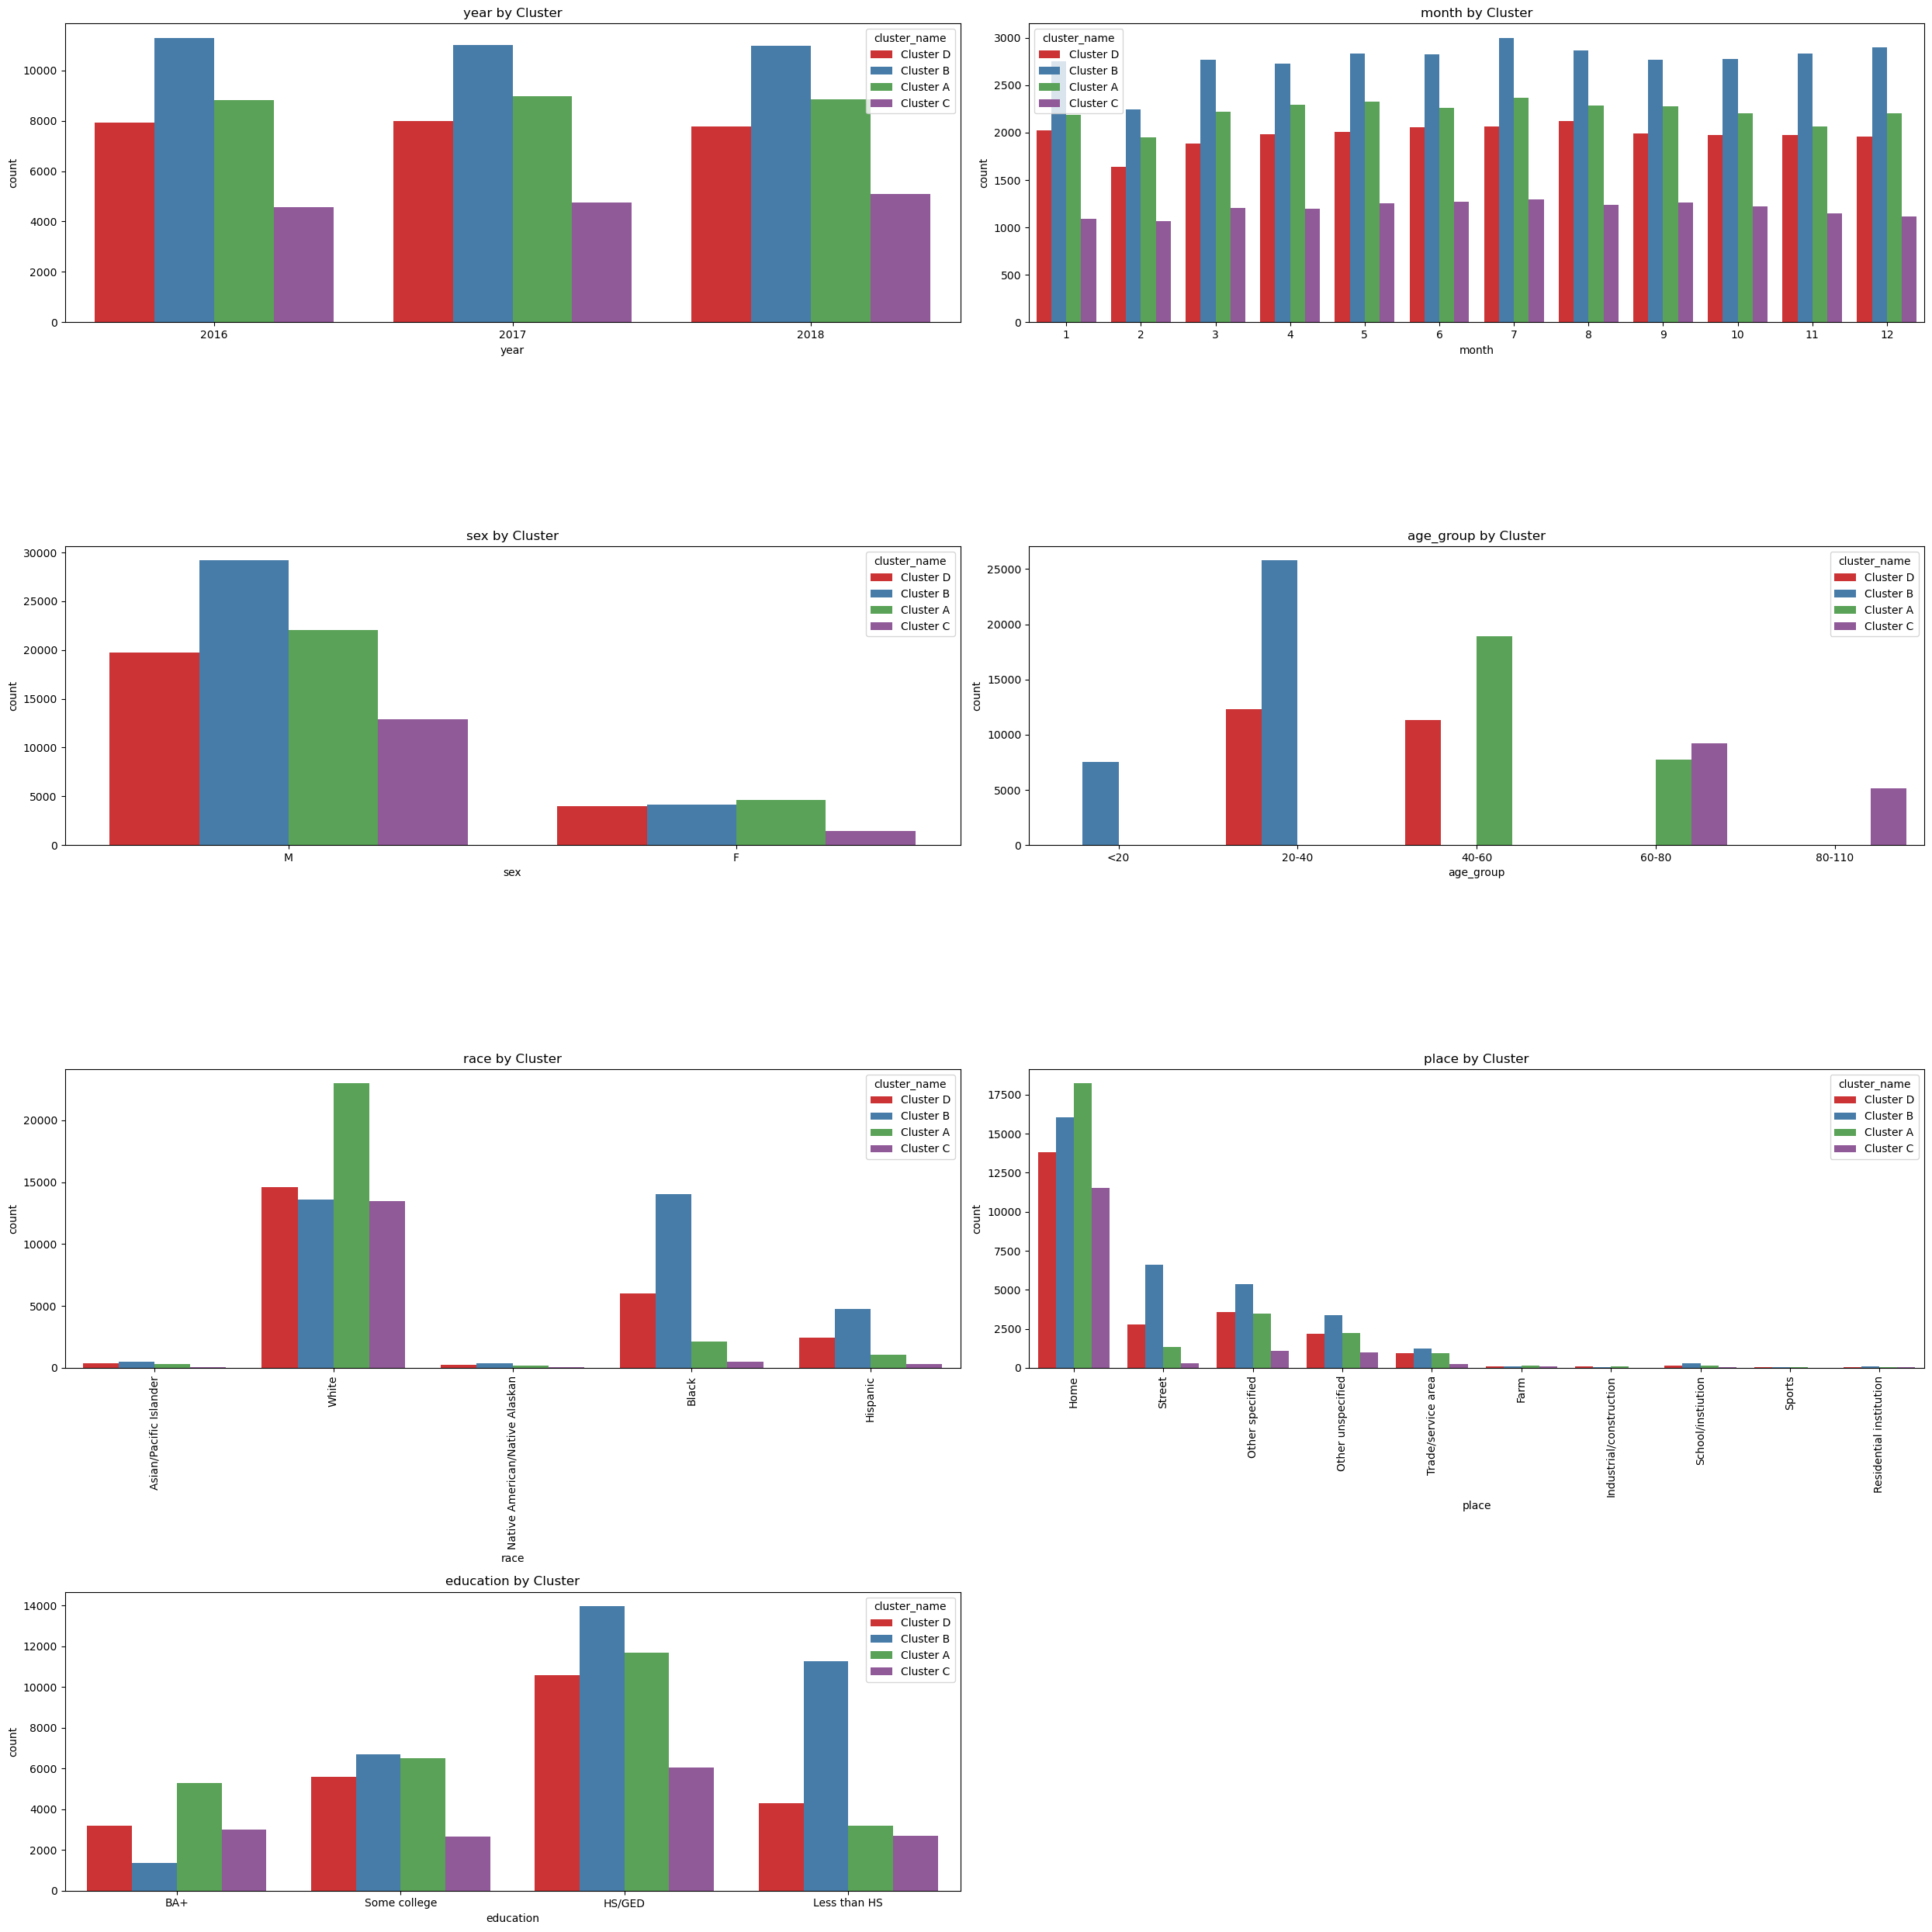

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("gun_deaths.csv")

# Preprocess the dataset
df = df.dropna()

# Create a copy of the dataframe for encoding
df_encoded = df.copy()

# Encode categorical features
label_encoder = LabelEncoder()
df_encoded["sex"] = label_encoder.fit_transform(df_encoded["sex"])
df_encoded["race"] = label_encoder.fit_transform(df_encoded["race"])
df_encoded["place"] = label_encoder.fit_transform(df_encoded["place"])
df_encoded["education"] = label_encoder.fit_transform(df_encoded["education"])

# Select relevant features for clustering
features_for_clustering = ["year", "month", "sex", "age", "race", "place", "education"]

X = df_encoded[features_for_clustering]

# Define the clustering algorithm
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit and predict the clusters using the features
kmeans_labels = kmeans.fit_predict(X)

# Assign cluster labels to the original dataframe
df["cluster"] = kmeans_labels

# Name the clusters
cluster_names = {0: "Cluster A", 1: "Cluster B", 2: "Cluster C", 3: "Cluster D"}
df["cluster_name"] = df["cluster"].map(cluster_names)

# Create age groups
bins = [0, 20, 40, 60, 80, 110]
labels = ['<20', '20-40', '40-60', '60-80', '80-110']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Update features_for_clustering to include 'age_group' instead of 'age'
features_for_clustering = ["year", "month", "sex", "age_group", "race", "place", "education"]

# Create a catplot with subplots for each feature
plt.figure(figsize=(25, 25))
for i, feature in enumerate(features_for_clustering):
    plt.subplot(len(features_for_clustering)//2 + len(features_for_clustering)%2, 2, i + 1)  # Adjust the subplot layout as needed
    ax = sns.countplot(data=df, x=feature, hue="cluster_name", palette="Set1")
    plt.title(f"{feature} by Cluster")
    if feature in ["race", "place"]:
        plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()


In [16]:
# Load the dataset
df = pd.read_csv("gun_deaths.csv")

# Preprocess the dataset
df = df.dropna()

# Use a subset of the data
df_subset = df.sample(n=1000)  # Adjust the number based on your available memory

# Encode categorical features
label_encoder = LabelEncoder()
df_subset["sex"] = label_encoder.fit_transform(df_subset["sex"])
df_subset["race"] = label_encoder.fit_transform(df_subset["race"])
df_subset["place"] = label_encoder.fit_transform(df_subset["place"])
df_subset["education"] = label_encoder.fit_transform(df_subset["education"])

# Select relevant features for clustering
features_for_clustering = ["year", "month", "sex", "age", "race", "place", "education"]

X = df_subset[features_for_clustering]

agg = AgglomerativeClustering(n_clusters=4)

agg_labels = agg.fit_predict(X)

agg_sil = silhouette_score(X, agg_labels)
agg_ch = calinski_harabasz_score(X, agg_labels)
agg_db = davies_bouldin_score(X, agg_labels)

print("Agglomerative")
print("Silhouette score:", agg_sil)
print("Calinski-Harabasz score:", agg_ch)
print("Davies-Bouldin score:", agg_db)

Agglomerative
Silhouette score: 0.4094260486094573
Calinski-Harabasz score: 2275.348808984371
Davies-Bouldin score: 0.806167739987643


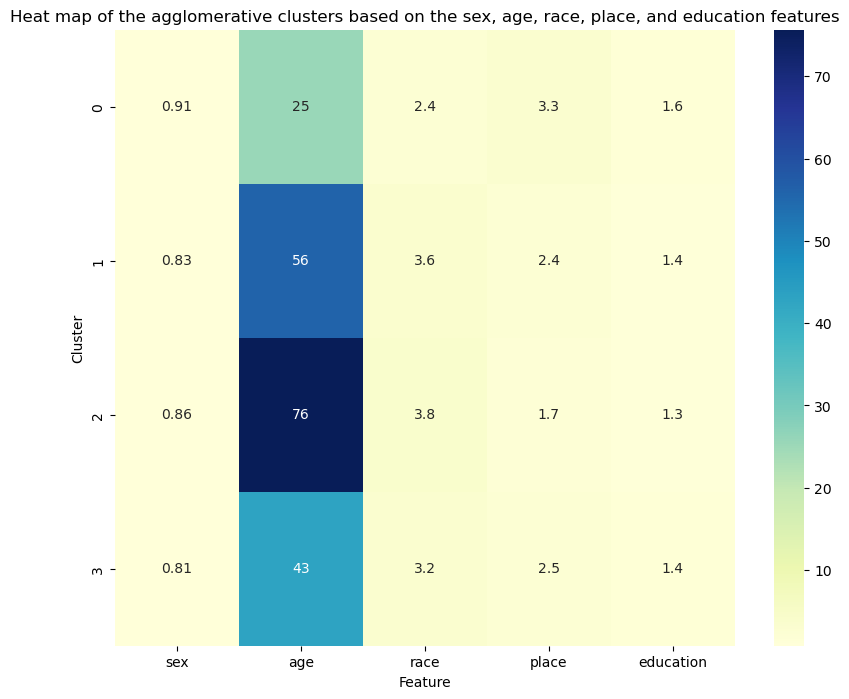

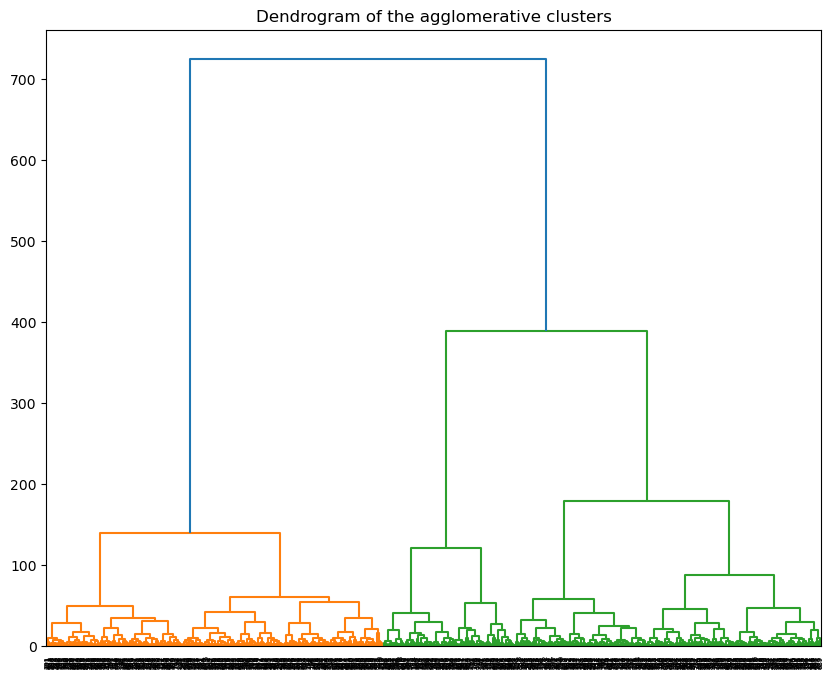

In [26]:
# Assign cluster labels to the subset dataframe
df_subset["agg_cluster"] = agg_labels

# Create a heat map of the clusters based on the sex, age, race, place, and education features
plt.figure(figsize=(10, 8))
sns.heatmap(df_subset.groupby("agg_cluster")[["sex", "age", "race", "place", "education"]].mean(), annot=True, cmap="YlGnBu")
plt.xlabel("Feature")
plt.ylabel("Cluster")
plt.title("Heat map of the agglomerative clusters based on the sex, age, race, place, and education features")
plt.show()

from scipy.cluster.hierarchy import dendrogram, linkage
import scipy

plt.figure(figsize=(10, 8))
Z = scipy.cluster.hierarchy.linkage(X, method="ward")
dendrogram = scipy.cluster.hierarchy.dendrogram(Z)
plt.title("Dendrogram of the agglomerative clusters")
plt.show()

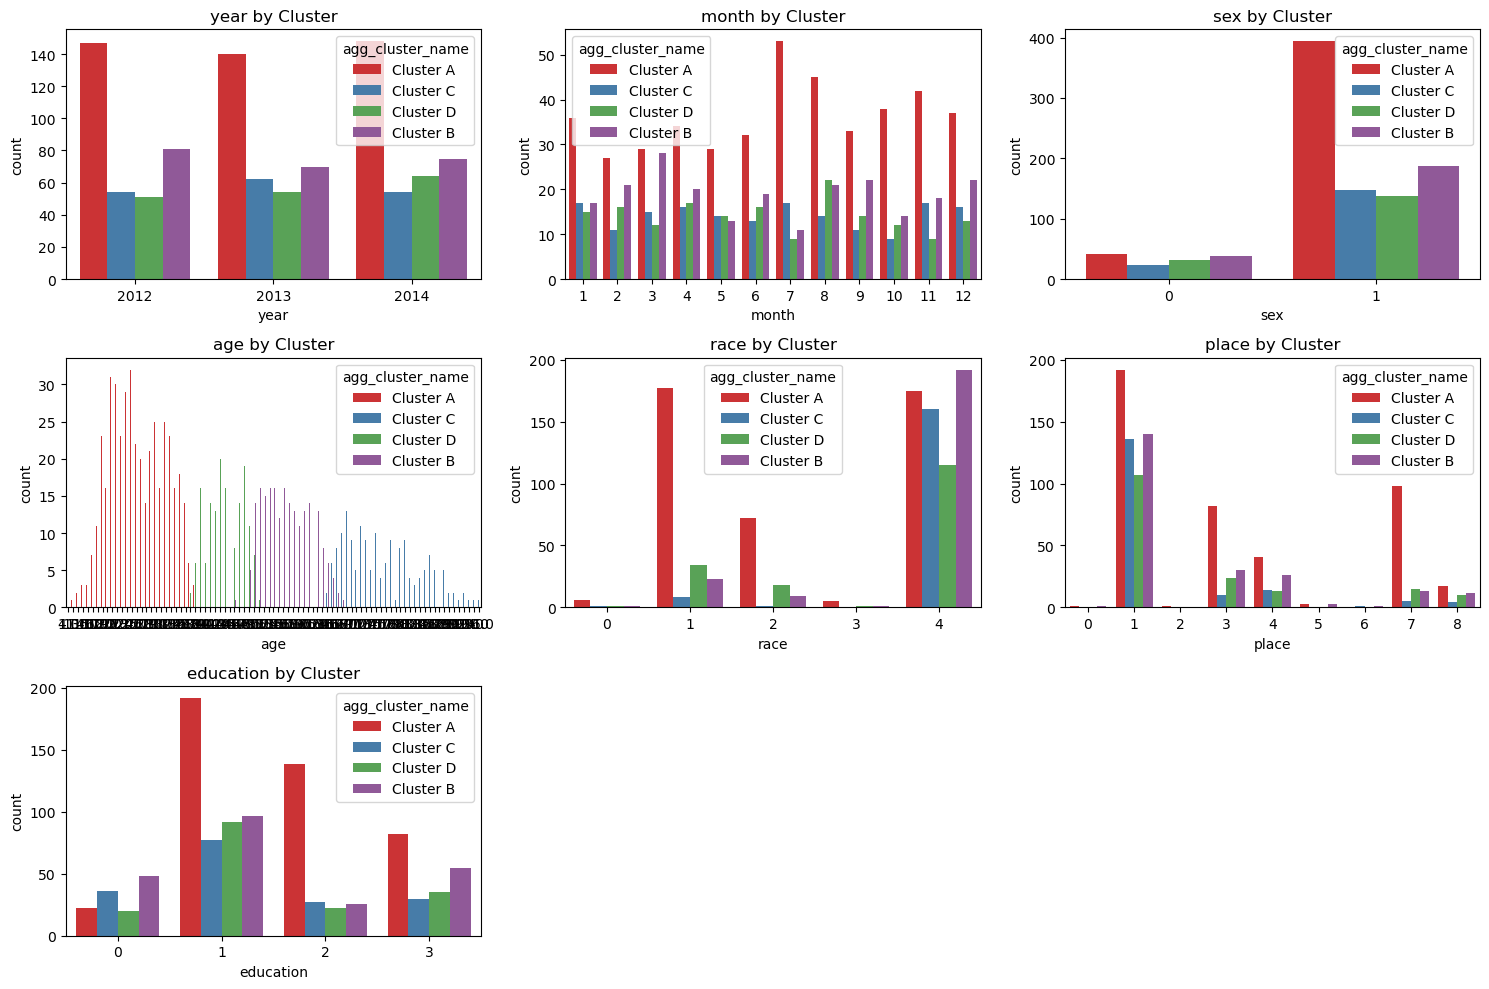

In [18]:
# Assign cluster labels to the subset dataframe
df_subset["agg_cluster"] = agg_labels

# Name the clusters
cluster_names = {0: "Cluster A", 1: "Cluster B", 2: "Cluster C", 3: "Cluster D"}
df_subset["agg_cluster_name"] = df_subset["agg_cluster"].map(cluster_names)

# Create a catplot with subplots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_for_clustering):
    plt.subplot(2, 2, i + 1)  # Adjust the subplot layout as needed
    sns.countplot(data=df_subset, x=feature, hue="agg_cluster_name", palette="Set1")
    plt.title(f"{feature} by Cluster")

plt.tight_layout()
plt.show()


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("gun_deaths.csv")

# Preprocess the dataset
df = df.dropna()

# Create a copy of the dataframe for encoding
df_encoded = df.copy()

# Encode categorical features
label_encoder = LabelEncoder()
df_encoded["sex"] = label_encoder.fit_transform(df_encoded["sex"])
df_encoded["race"] = label_encoder.fit_transform(df_encoded["race"])
df_encoded["place"] = label_encoder.fit_transform(df_encoded["place"])
df_encoded["education"] = label_encoder.fit_transform(df_encoded["education"])

# Select relevant features for clustering
features_for_clustering = ["year", "month", "sex", "age", "race", "place", "education"]

X = df_encoded[features_for_clustering]

# Define the clustering algorithm
agg = AgglomerativeClustering(n_clusters=4)

# Fit and predict the clusters using the features
agg_labels = agg.fit_predict(X)

# Assign cluster labels to the original dataframe
df["agg_cluster"] = agg_labels

# Name the clusters
cluster_names = {0: "Cluster A", 1: "Cluster B", 2: "Cluster C", 3: "Cluster D"}
df["agg_cluster_name"] = df["agg_cluster"].map(cluster_names)

# Create age groups
bins = [0, 20, 40, 60, 80, 110]
labels = ['<20', '20-40', '40-60', '60-80', '80-110']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Update features_for_clustering to include 'age_group' instead of 'age'
features_for_clustering = ["year", "month", "sex", "age_group", "race", "place", "education"]

# Create a catplot with subplots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_for_clustering):
    plt.subplot(len(features_for_clustering)//2 + len(features_for_clustering)%2, 2, i + 1)  # Adjust the subplot layout as needed
    ax = sns.countplot(data=df, x=feature, hue="agg_cluster_name", palette="Set1")
    plt.title(f"{feature} by Cluster")
    if feature in ["race", "place"]:
        plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

    # Add count values above each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

plt.tight_layout()
plt.show()


MemoryError: unable to allocate array data.

In [ ]:
# Use a subset of the data
df_subset = df.sample(n=70000)  # Adjust the number based on your available memory

# Encode categorical features
label_encoder = LabelEncoder()
df_subset["sex"] = label_encoder.fit_transform(df_subset["sex"])
df_subset["race"] = label_encoder.fit_transform(df_subset["race"])
df_subset["place"] = label_encoder.fit_transform(df_subset["place"])
df_subset["education"] = label_encoder.fit_transform(df_subset["education"])

# Select relevant features for clustering
features_for_clustering = ["year", "month", "sex", "age", "race", "place", "education"]

X_subset = df_subset[features_for_clustering]

# Define the clustering algorithm
agg = AgglomerativeClustering(n_clusters=4)

# Fit and predict the clusters using the features
agg_labels = agg.fit_predict(X_subset)

# Assign cluster labels to the subset dataframe
df_subset["agg_cluster"] = agg_labels

# Name the clusters
cluster_names = {0: "Cluster A", 1: "Cluster B", 2: "Cluster C", 3: "Cluster D"}
df_subset["agg_cluster_name"] = df_subset["agg_cluster"].map(cluster_names)

# Create age groups
bins = [0, 20, 40, 60, 80, 110]
labels = ['<20', '20-40', '40-60', '60-80', '80-110']
df_subset['age_group'] = pd.cut(df_subset['age'], bins=bins, labels=labels, right=False)

# Update features_for_clustering to include 'age_group' instead of 'age'
features_for_clustering = ["year", "month", "sex", "age_group", "race", "place", "education"]

# Create a catplot with subplots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_for_clustering):
    plt.subplot(len(features_for_clustering)//2 + len(features_for_clustering)%2, 2, i + 1)  # Adjust the subplot layout as needed
    ax = sns.countplot(data=df_subset, x=feature, hue="agg_cluster_name", palette="Set1")
    plt.title(f"{feature} by Cluster")
    if feature in ["race", "place"]:
        plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()


In [ ]:
# Create a heat map of the clusters based on the sex, age, race, place, and education features
plt.figure(figsize=(10, 8))
sns.heatmap(data.groupby("cluster")[["sex", "age", "race", "place", "education"]].mean(), annot=True, cmap="YlGnBu")
plt.xlabel("Feature")
plt.ylabel("Cluster")
plt.title("Heat map of the Gaussian mixture clusters based on the sex, age, race, place, and education features")
plt.show()

C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Gaussian Mixture
Silhouette score: -0.07660480318467201
Calinski-Harabasz score: 85.47475931967297
Davies-Bouldin score: 12.584565111701517


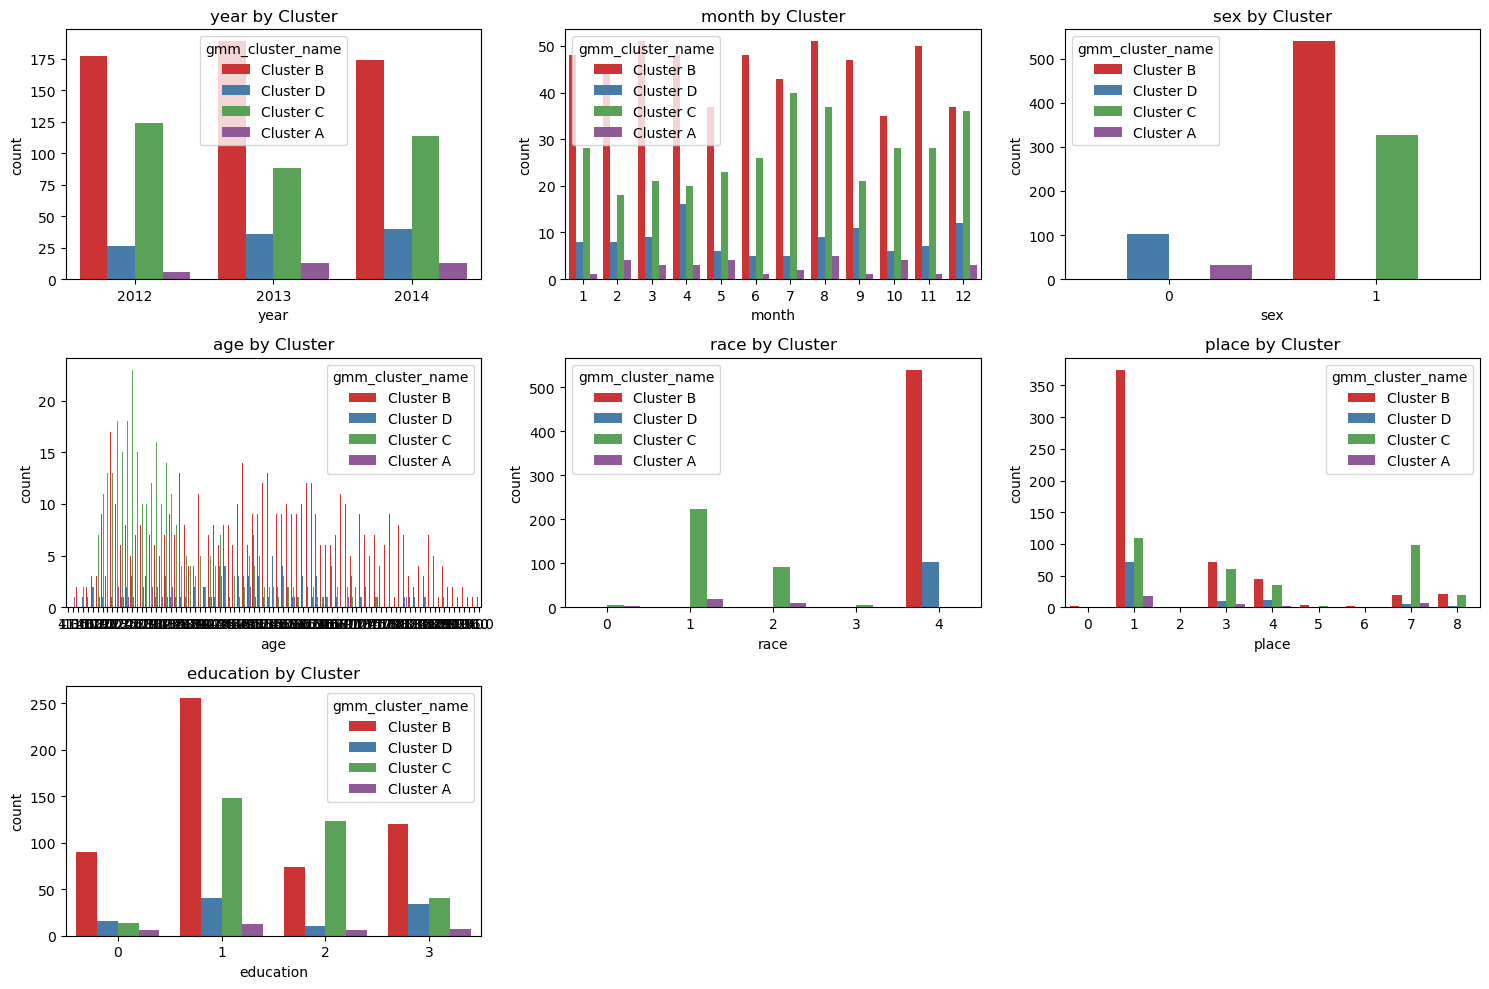

In [19]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X)

gmm_sil = silhouette_score(X, gmm_labels)
gmm_ch = calinski_harabasz_score(X, gmm_labels)
gmm_db = davies_bouldin_score(X, gmm_labels)

print("Gaussian Mixture")
print("Silhouette score:", gmm_sil)
print("Calinski-Harabasz score:", gmm_ch)
print("Davies-Bouldin score:", gmm_db)

# Assign cluster labels to the subset dataframe
df_subset["gmm_cluster"] = gmm_labels

# Name the clusters
cluster_names = {0: "Cluster A", 1: "Cluster B", 2: "Cluster C", 3: "Cluster D"}
df_subset["gmm_cluster_name"] = df_subset["gmm_cluster"].map(cluster_names)

# Create a catplot with subplots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_for_clustering):
    plt.subplot(2, 2, i + 1)  # Adjust the subplot layout as needed
    sns.countplot(data=df_subset, x=feature, hue="gmm_cluster_name", palette="Set1")
    plt.title(f"{feature} by Cluster")

plt.tight_layout()
plt.show()


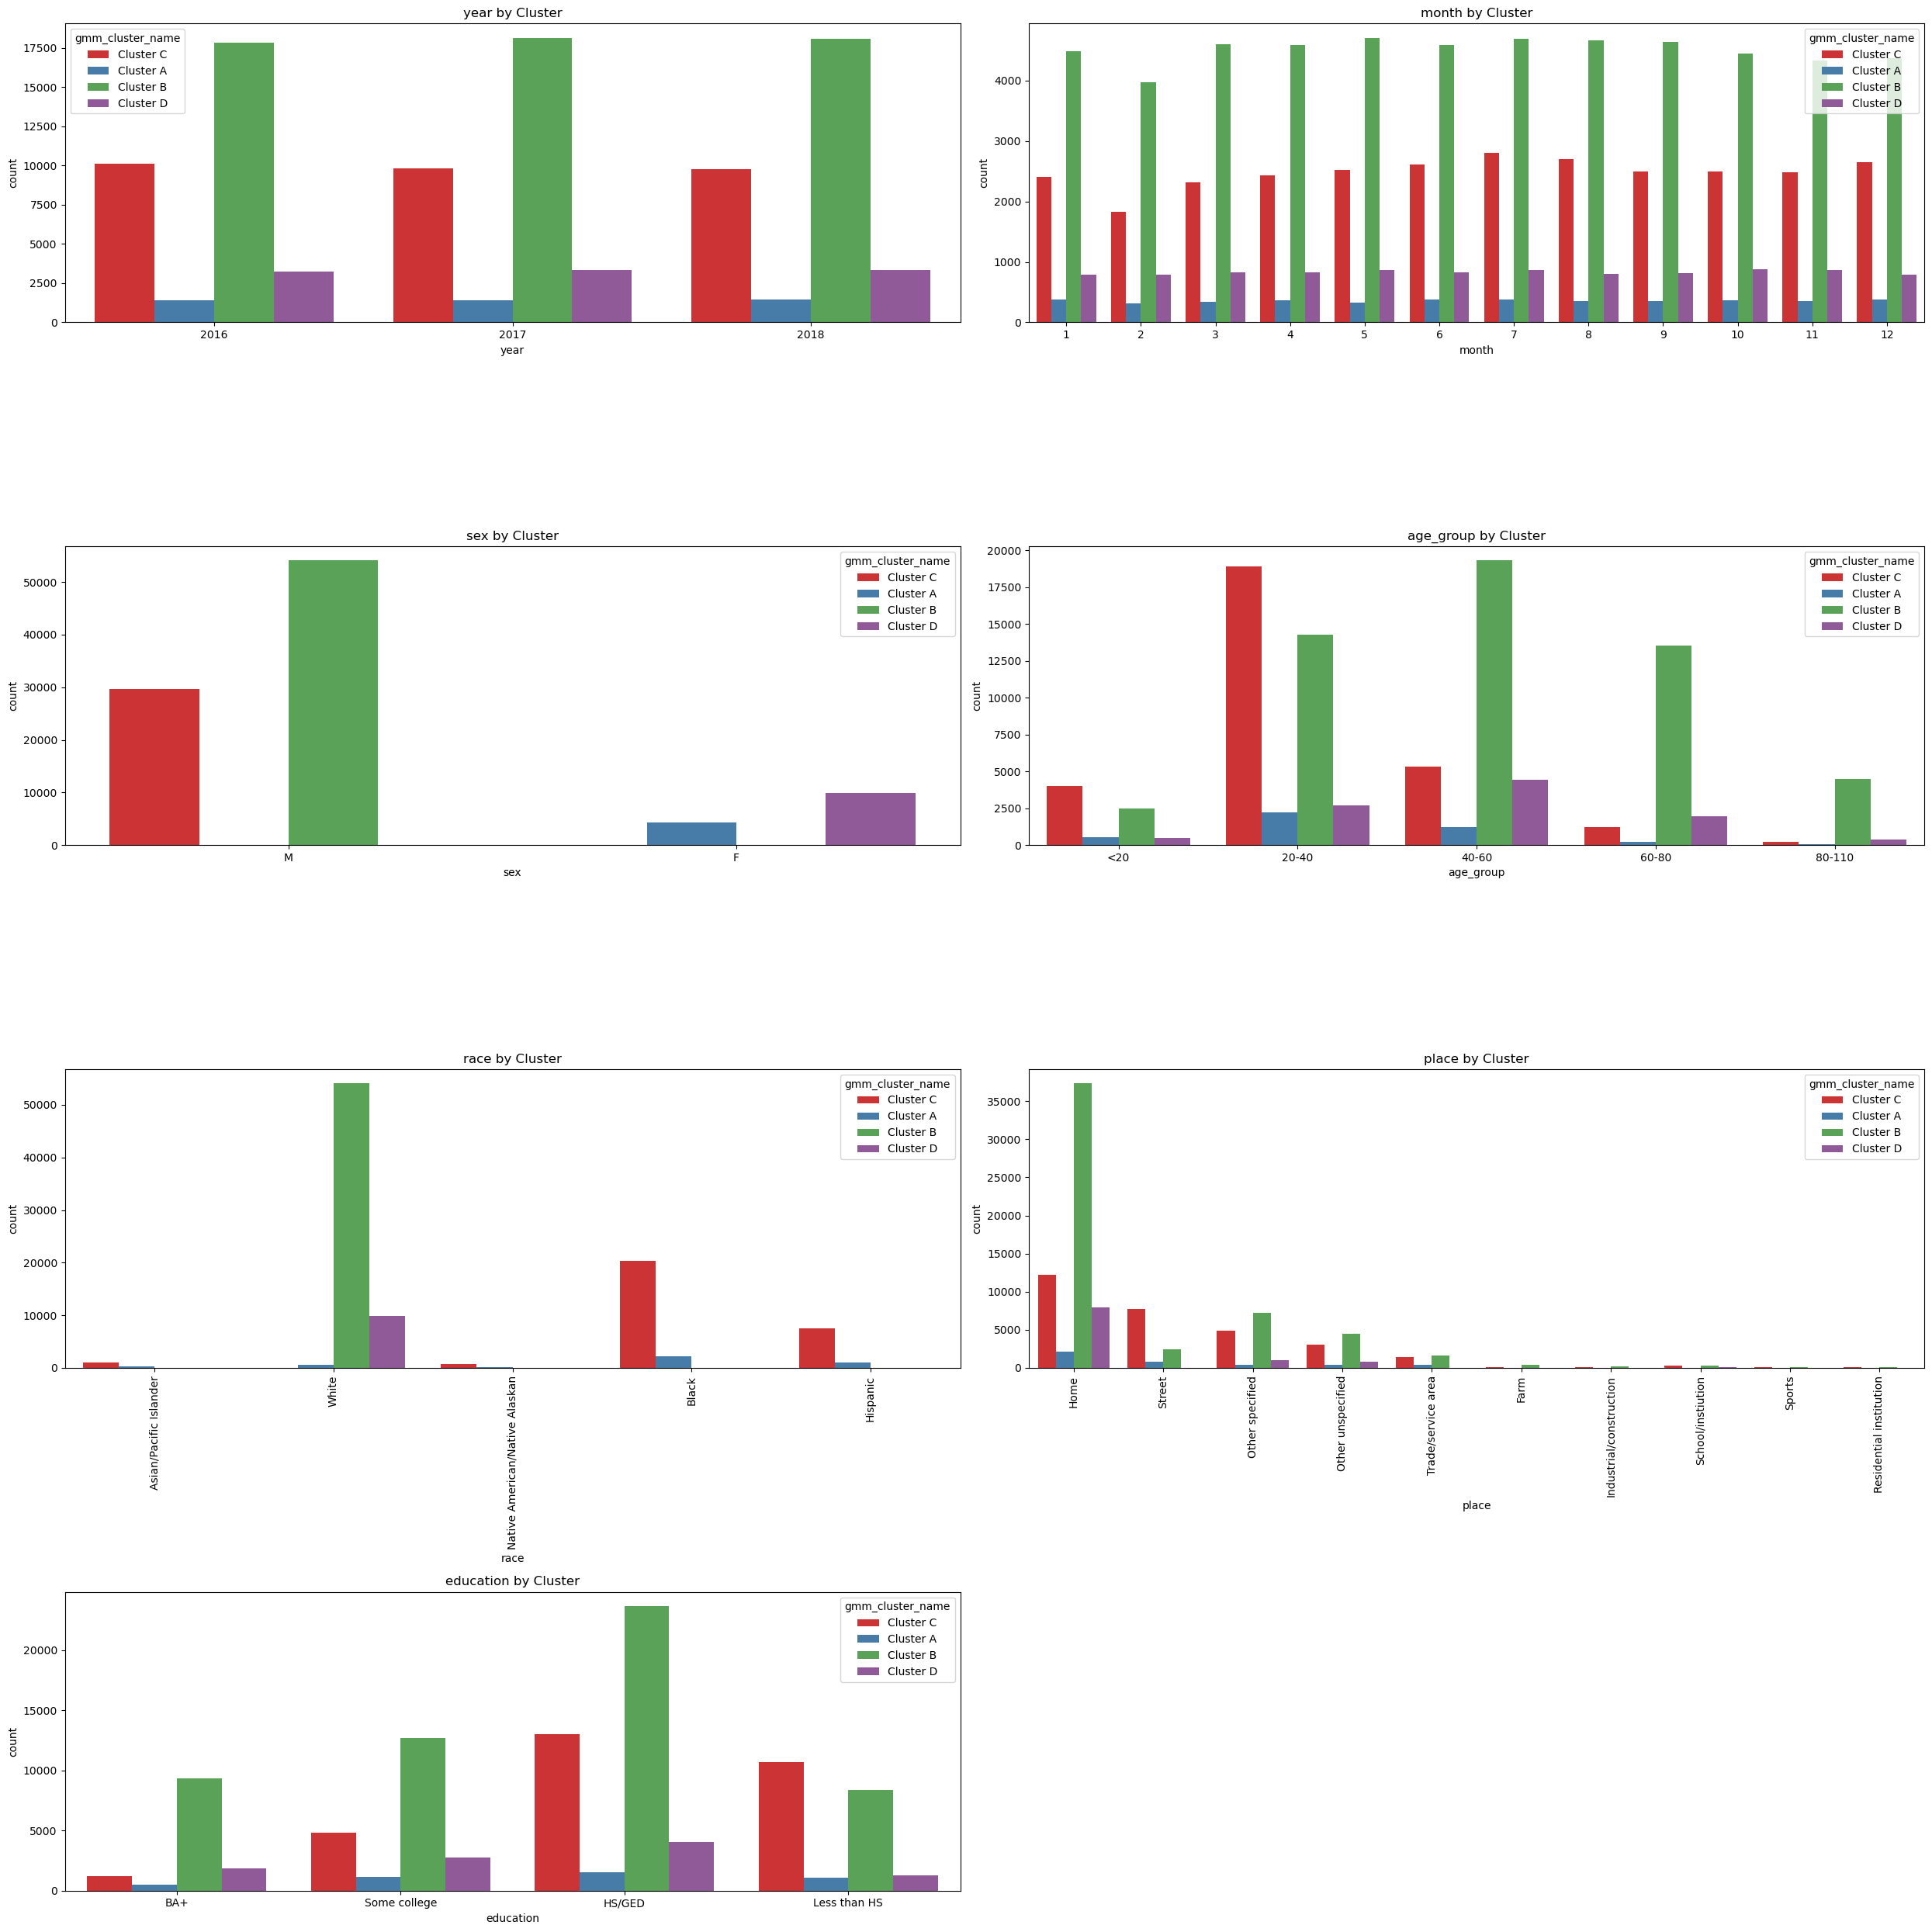

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("gun_deaths.csv")

# Preprocess the dataset
df = df.dropna()

# Create a copy of the dataframe for encoding
df_encoded = df.copy()

# Encode categorical features
label_encoder = LabelEncoder()
df_encoded["sex"] = label_encoder.fit_transform(df_encoded["sex"])
df_encoded["race"] = label_encoder.fit_transform(df_encoded["race"])
df_encoded["place"] = label_encoder.fit_transform(df_encoded["place"])
df_encoded["education"] = label_encoder.fit_transform(df_encoded["education"])

# Select relevant features for clustering
features_for_clustering = ["year", "month", "sex", "age", "race", "place", "education"]

X = df_encoded[features_for_clustering]

# Define the clustering algorithm
gmm = GaussianMixture(n_components=4, random_state=42)

# Fit and predict the clusters using the features
gmm_labels = gmm.fit_predict(X)

# Assign cluster labels to the original dataframe
df["gmm_cluster"] = gmm_labels

# Name the clusters
cluster_names = {0: "Cluster A", 1: "Cluster B", 2: "Cluster C", 3: "Cluster D"}
df["gmm_cluster_name"] = df["gmm_cluster"].map(cluster_names)

# Create age groups
bins = [0, 20, 40, 60, 80, 110]
labels = ['<20', '20-40', '40-60', '60-80', '80-110']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Update features_for_clustering to include 'age_group' instead of 'age'
features_for_clustering = ["year", "month", "sex", "age_group", "race", "place", "education"]

# Create a catplot with subplots for each feature
plt.figure(figsize=(25, 25))
for i, feature in enumerate(features_for_clustering):
    plt.subplot(len(features_for_clustering)//2 + len(features_for_clustering)%2, 2, i + 1)  # Adjust the subplot layout as needed
    ax = sns.countplot(data=df, x=feature, hue="gmm_cluster_name", palette="Set1")
    plt.title(f"{feature} by Cluster")
    if feature in ["race", "place"]:
        plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()


C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lovel\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


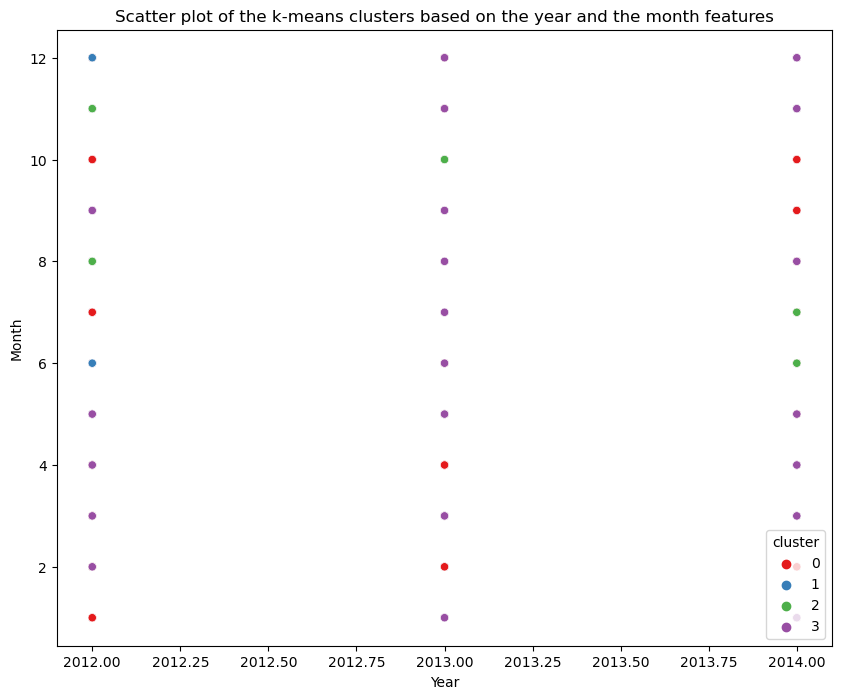

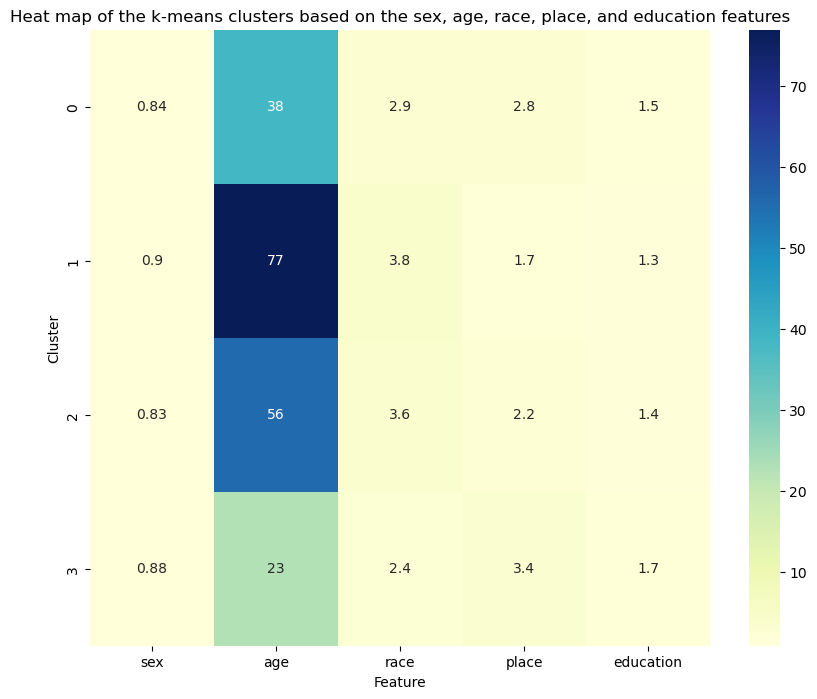

In [7]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
data = pd.read_csv("gun_deaths.csv")
# Preprocess the dataset
data = data.dropna()

# Encode categorical features
label_encoder = LabelEncoder()
data["sex"] = label_encoder.fit_transform(data["sex"])
data["race"] = label_encoder.fit_transform(data["race"])
data["place"] = label_encoder.fit_transform(data["place"])
data["education"] = label_encoder.fit_transform(data["education"])


# Apply the k-means algorithm with 4 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data[["year", "month", "sex", "age", "race", "place", "education"]])
data["cluster"] = kmeans.labels_

# Create a scatter plot of the clusters based on the year and the month features
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x="year", y="month", hue="cluster", palette="Set1")
plt.xlabel("Year")
plt.ylabel("Month")
plt.title("Scatter plot of the k-means clusters based on the year and the month features")
plt.show()

# Create a heat map of the clusters based on the sex, age, race, place, and education features
plt.figure(figsize=(10, 8))
sns.heatmap(data.groupby("cluster")[["sex", "age", "race", "place", "education"]].mean(), annot=True, cmap="YlGnBu")
plt.xlabel("Feature")
plt.ylabel("Cluster")
plt.title("Heat map of the k-means clusters based on the sex, age, race, place, and education features")
plt.show()

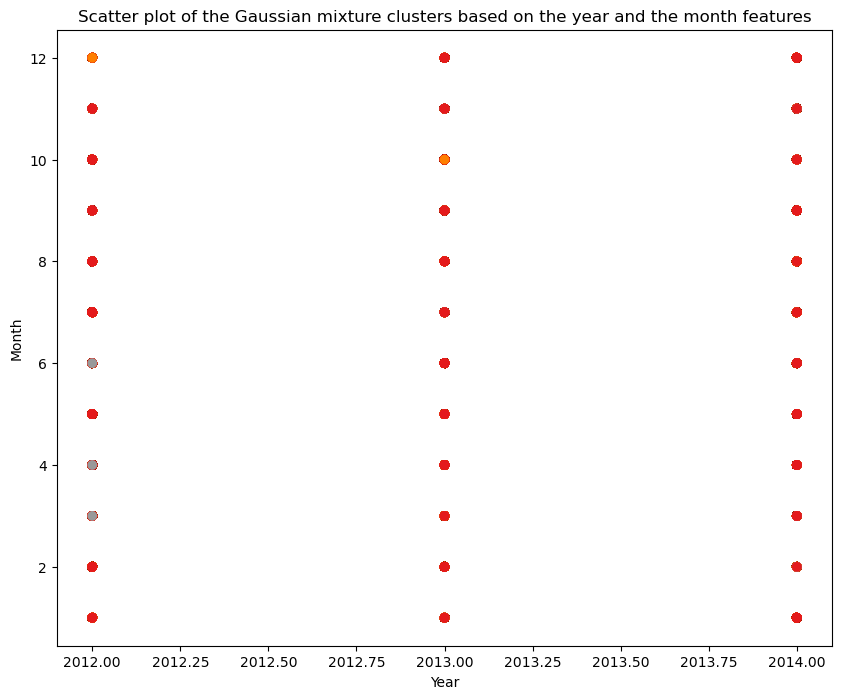

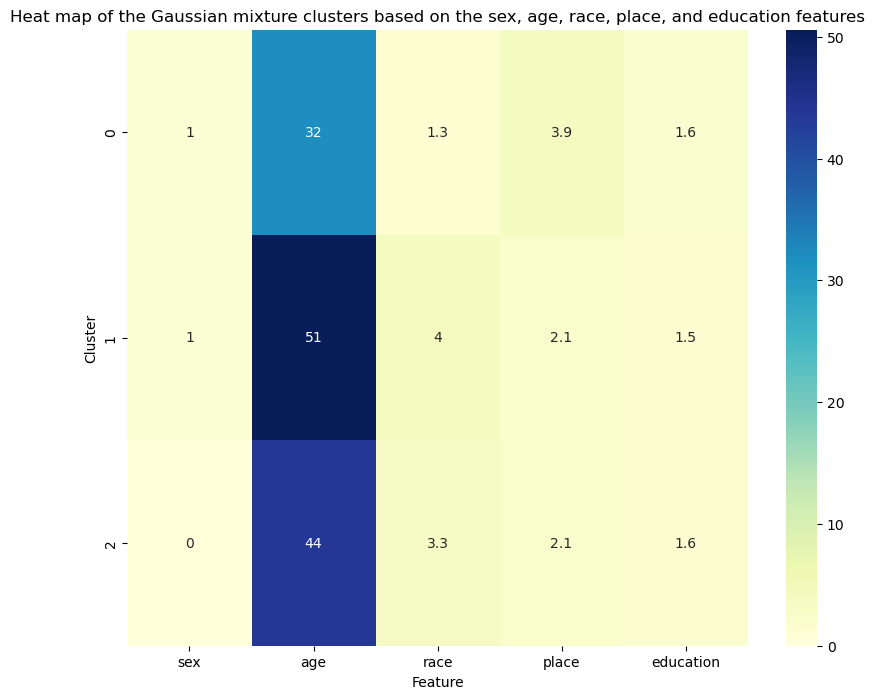

In [10]:
# Apply the Gaussian mixture algorithm with 3 clusters
gm = GaussianMixture(n_components=3, random_state=0)
gm.fit(data[["year", "month", "sex", "age", "race", "place", "education"]])
data["cluster"] = gm.predict(data[["year", "month", "sex", "age", "race", "place", "education"]])

# Create a scatter plot of the clusters based on the year and the month features
plt.figure(figsize=(10, 8))
plt.scatter(data["year"], data["month"], c=data["cluster"], cmap="Set1")
plt.xlabel("Year")
plt.ylabel("Month")
plt.title("Scatter plot of the Gaussian mixture clusters based on the year and the month features")
plt.show()

# Create a heat map of the clusters based on the sex, age, race, place, and education features
plt.figure(figsize=(10, 8))
sns.heatmap(data.groupby("cluster")[["sex", "age", "race", "place", "education"]].mean(), annot=True, cmap="YlGnBu")
plt.xlabel("Feature")
plt.ylabel("Cluster")
plt.title("Heat map of the Gaussian mixture clusters based on the sex, age, race, place, and education features")
plt.show()